<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/SimpleKMeansClustering_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [39]:
from sklearn import metrics
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")



In [40]:
iris_df = pd.read_csv("/content/sample_data/iris.csv",
                        skiprows=1,
                         names = ['sepal-length',
                                  'sepal-width',
                                  'petal-length',
                                  'petal-width',
                                 'class'])

iris_df.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
iris_df.shape

(150, 5)

In [42]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()




,sepal-length,sepal-width,petal-length,petal-width,class
0,5.4,3.9,1.3,0.4,0
1,4.9,2.5,4.5,1.7,2
2,6.6,3.0,4.4,1.4,1
3,5.2,4.1,1.5,0.1,0
4,5.6,3.0,4.5,1.5,1


In [45]:
iris_df.describe()


,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [46]:
iris_df['class'].unique()


array([0, 2, 1])

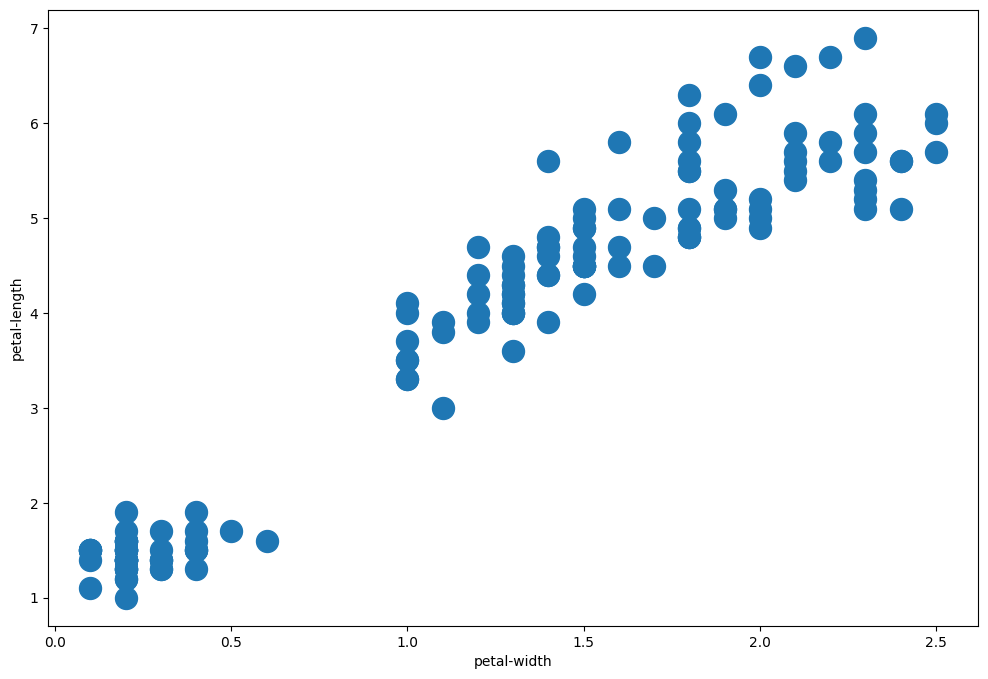

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)
plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()


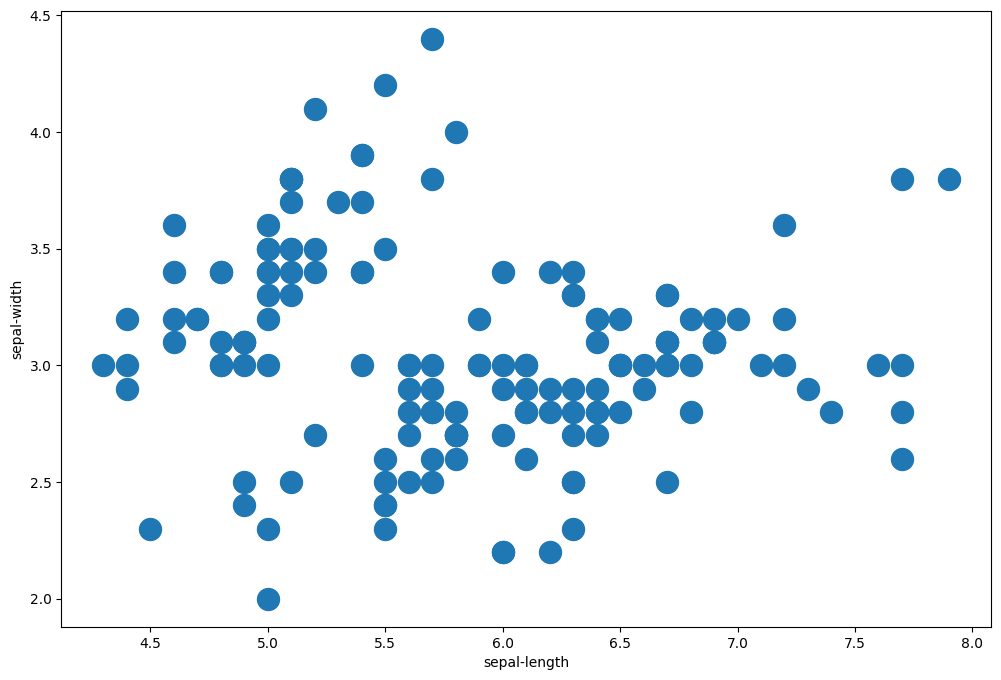

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()


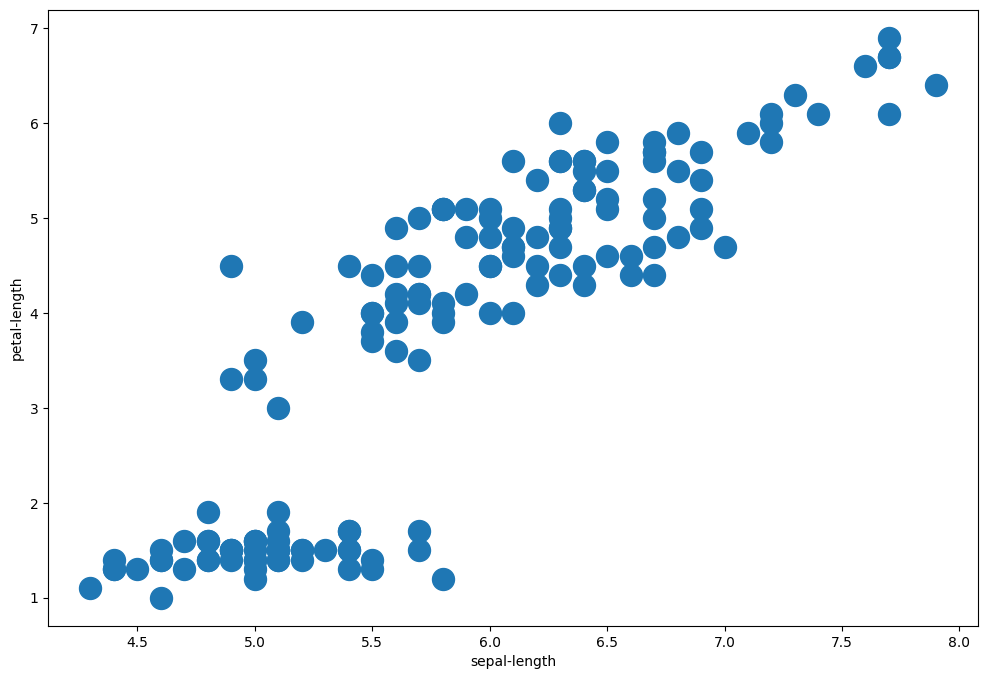

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.show()


In [50]:
iris_2D = iris_df[['sepal-length', 'petal-length']]
iris_2D.sample(5)



,sepal-length,petal-length
109,4.6,1.0
21,5.8,1.2
27,5.3,1.5
135,6.3,5.1
22,6.7,5.7


In [51]:
iris_2D.shape

(150, 2)

In [54]:
iris_2D = np.array(iris_2D)

In [55]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)


In [56]:
kmeans_model_2D.labels_


array([1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1,
       0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1,
       2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1], dtype=int32)

In [57]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

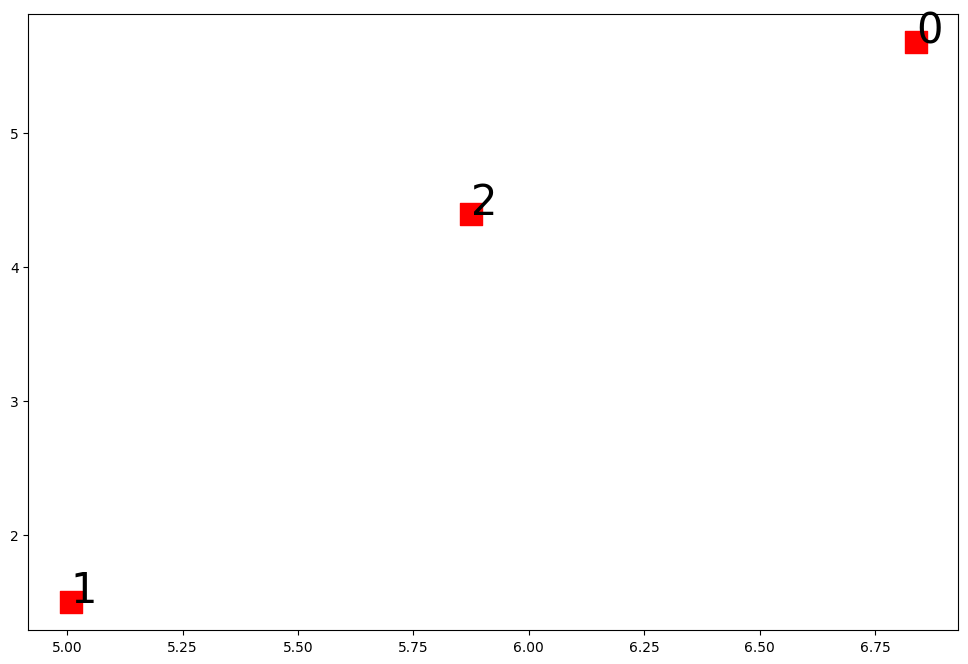

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [61]:
iris_labels = iris_df['class']

In [62]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))
print("v_measure_score:", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model_2D.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))


Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score: 0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409135
Silhouette_score:  0.5890612473759282
